In [1]:
import numpy as np
import pandas as pd

In [2]:
from numpy import mean
from numpy import std
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

Exploratory data analysis

In [4]:
df = pd.read_csv('Complete-data.csv')
df.head()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
0,0,3,3,2,2,2,1,4,2,2,3,3,2
1,0,1,5,2,3,1,1,4,2,5,5,2,2
2,0,3,4,3,2,2,4,3,2,4,5,2,2
3,0,1,3,3,3,5,1,2,4,3,5,3,3
4,0,5,4,2,1,4,1,2,4,3,3,1,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Landslide      1212 non-null   int64
 1   Aspect         1212 non-null   int64
 2   Curvature      1212 non-null   int64
 3   Earthquake     1212 non-null   int64
 4   Elevation      1212 non-null   int64
 5   Flow           1212 non-null   int64
 6   Lithology      1212 non-null   int64
 7   NDVI           1212 non-null   int64
 8   NDWI           1212 non-null   int64
 9   Plan           1212 non-null   int64
 10  Precipitation  1212 non-null   int64
 11  Profile        1212 non-null   int64
 12  Slope          1212 non-null   int64
dtypes: int64(13)
memory usage: 123.2 KB


In [6]:
temp_cols=df.columns.tolist()
new_cols=temp_cols[1:] + temp_cols[0:1]
df=df[new_cols]

In [7]:
df.describe().round(2)

,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,Landslide
count,1212.00,1212.00,1212.00,1212.00,1212.00,1212.00,1212.00,1212.00,1212.00,1212.00,1212.00,1212.00,1212.0
mean,2.96,2.98,2.10,2.44,2.34,1.95,3.04,2.77,3.06,3.81,3.26,2.81,0.5
std,1.15,1.10,0.67,1.24,1.11,1.42,1.24,1.30,1.06,1.35,1.04,1.19,0.5
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0
25%,2.00,2.00,2.00,1.00,2.00,1.00,2.00,2.00,2.00,3.00,3.00,2.00,0.0
50%,3.00,3.00,2.00,2.00,2.00,1.00,3.00,3.00,3.00,4.00,3.00,3.00,0.5
75%,4.00,4.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,1.0
max,5.00,5.00,3.00,5.00,5.00,6.00,5.00,5.00,5.00,5.00,5.00,5.00,1.0


In [8]:
for column in df.columns[0:]:
    print(column, ': ', len(df[column].unique()), ' labels')

Aspect :  5  labels
Curvature :  5  labels
Earthquake :  3  labels
Elevation :  5  labels
Flow :  5  labels
Lithology :  6  labels
NDVI :  5  labels
NDWI :  5  labels
Plan :  5  labels
Precipitation :  5  labels
Profile :  5  labels
Slope :  5  labels
Landslide :  2  labels


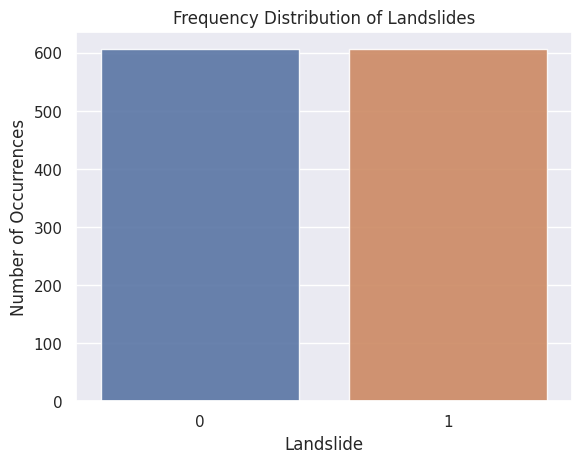

<Figure size 640x480 with 0 Axes>

In [10]:
landslide_count = df['Landslide'].value_counts()
sns.set(style = "darkgrid")
sns.barplot(x = landslide_count.index, y = landslide_count.values, alpha = 0.9)
plt.title('Frequency Distribution of Landslides')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Landslide', fontsize=12)
plt.show()

plt.savefig('bar1.eps', format='eps')

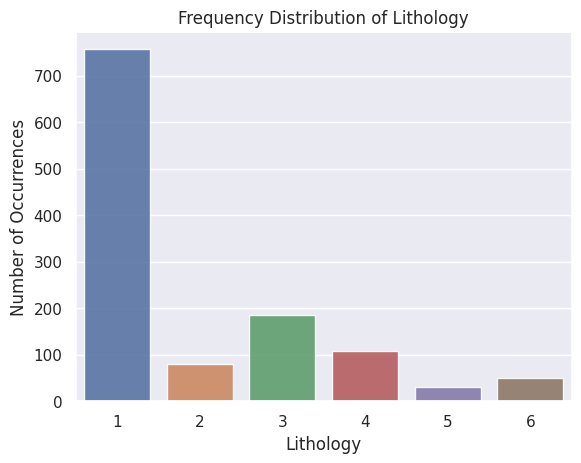

<Figure size 640x480 with 0 Axes>

In [12]:
lith_count = df['Lithology'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=lith_count.index, y=lith_count.values, alpha=0.9)
plt.title('Frequency Distribution of Lithology')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Lithology', fontsize=12)
plt.show()

plt.savefig('bar3.eps', format='eps')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 66.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 81.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


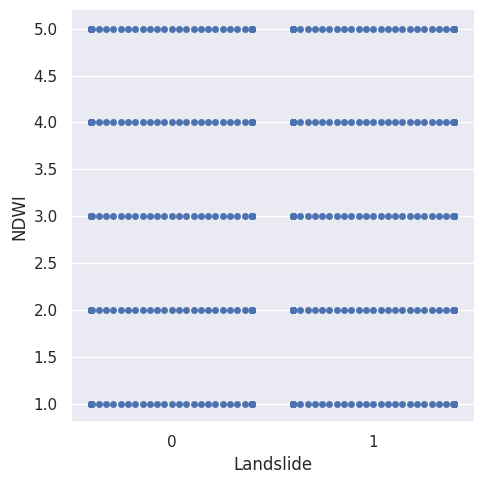

In [16]:
sns.catplot(x="Landslide", y="NDWI", kind="swarm", data=df)

plt.savefig('box1.eps', format='eps')

Feature Selection

In [17]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn import ensemble

In [18]:
!pip install pca

In [19]:
from sklearn.preprocessing import StandardScaler


In [20]:
from pca import pca

X_pca = df.loc[:, df.columns != 'Landslide']
model = pca()
out = model.fit_transform(X_pca)

print(out['topfeat'])


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [12] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [9] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [12] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
     PC        feature   loading  type
0   PC1           NDWI  0.619537  best
1   PC2      Curvature  0.490741  best
2   PC3      Lithology  0.544986  best
3   PC4  Precipitation -0.817487  best
4   PC5         Aspect -0.663196  best
5   PC6         Aspect -0.697202

[datazets] >WARNING> The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


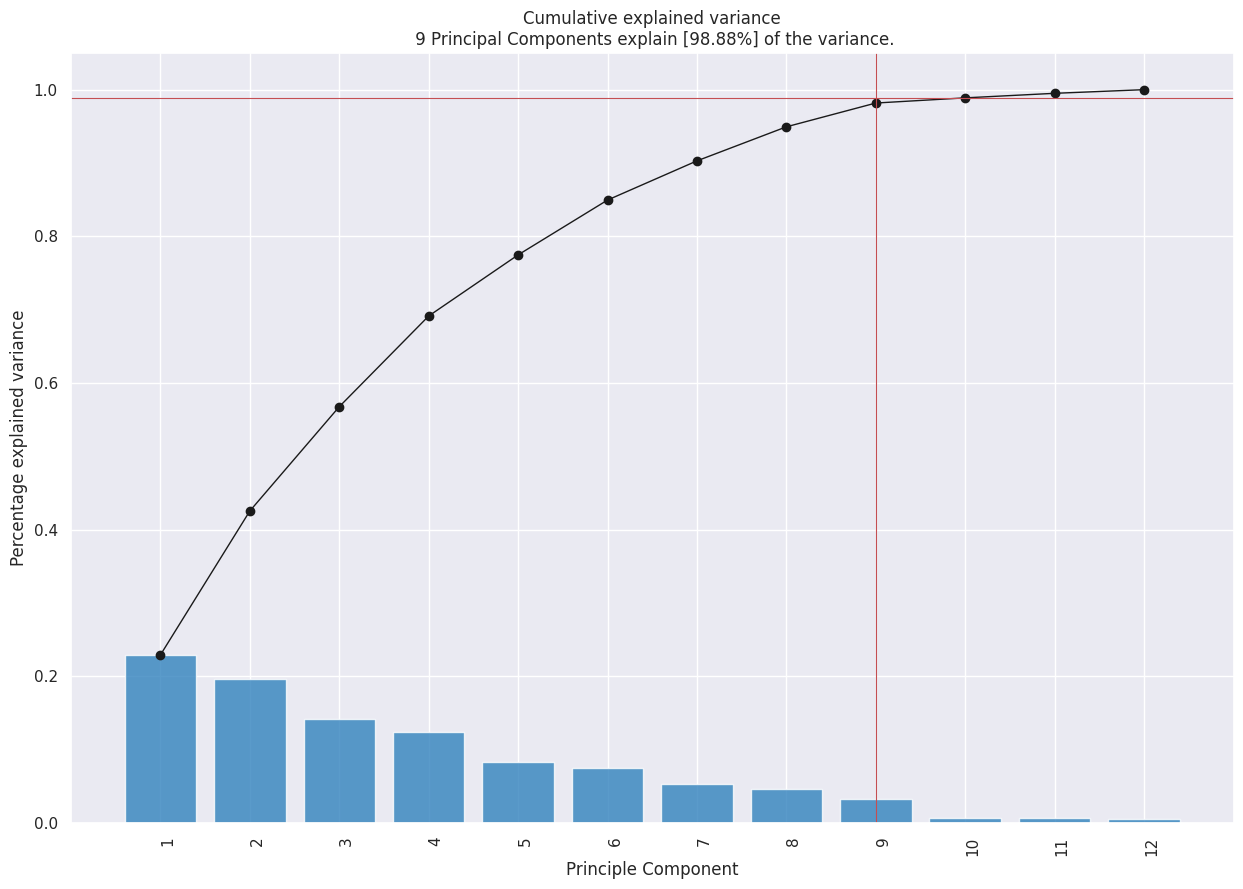

In [21]:
model.plot()

plt.savefig('pca1.eps', format='eps')

Baseline model

In [22]:
y = df.Landslide
df1 = df.loc[:, df.columns != 'Landslide']
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2)

In [23]:
baseline_gbm = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2,
                                          min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline_gbm.fit(X_train,y_train)
predictors_gbm=list(X_train)

print('Accuracy of the GBM on test set: {:.3f}'.format(baseline_gbm.score(X_test, y_test)))
pred_gbm=baseline_gbm.predict(X_test)
print(classification_report(y_test, pred_gbm))

Accuracy of the GBM on test set: 0.790
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       112
           1       0.81      0.79      0.80       131

    accuracy                           0.79       243
   macro avg       0.79      0.79      0.79       243
weighted avg       0.79      0.79      0.79       243



In [24]:
baseline_lgbm = LGBMClassifier(learning_rate=0.1, n_estimators=100,max_depth=3,
                               min_samples_leaf=1, subsample=1,random_state=10)
baseline_lgbm.fit(X_train,y_train)
predictors_lgbm=list(X_train)

print('Accuracy of the LGBM on test set: {:.3f}'.format(baseline_lgbm.score(X_test, y_test)))
pred_lgbm=baseline_lgbm.predict(X_test)
print(classification_report(y_test, pred_lgbm))


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
Accuracy of the LGBM on test set: 0.765
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       112
           1       0.80      0.76      0.78       131

    accuracy                           0.77       243
   macro avg       0.76      0.77      0.76       243
weighted avg       0.77      0.77      0.77       243



Model Tuning

In [34]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[50,100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator = GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1,
                                                            subsample=1,max_features='sqrt', random_state=10),
                                                            param_grid = p_test3, scoring='accuracy',n_jobs=4,
                                                            cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
learning_rate_gbm = tuning.best_params_.get("learning_rate")
n_estimators_gbm = tuning.best_params_.get("n_estimators")

In [36]:
p_test3a = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[50,100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =LGBMClassifier(max_depth=4, min_samples_leaf=1,
                                                subsample=1, random_state=10),
                                                param_grid = p_test3a, scoring='accuracy',n_jobs=4,
                                                cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
learning_rate_lgbm = tuning.best_params_.get("learning_rate")
n_estimators_lgbm = tuning.best_params_.get("n_estimators")

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1


In [37]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=learning_rate_gbm,n_estimators=n_estimators_gbm,
                                                            min_samples_split=2,
                                                            min_samples_leaf=1, subsample=1,max_features='sqrt',
                                                            random_state=10),
                                                            param_grid = p_test2, scoring='accuracy',n_jobs=4,
                                                             cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
max_depth_gbm = tuning.best_params_.get("max_depth")

In [39]:
p_test2a = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =LGBMClassifier(learning_rate=learning_rate_lgbm,n_estimators=n_estimators_lgbm,
                                                min_samples_leaf=1, subsample=1, random_state=10),
                                                param_grid = p_test2, scoring='accuracy',n_jobs=4,
                                     cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
max_depth_lgbm = tuning.best_params_.get("max_depth")

In [40]:
model1 = GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,max_depth=max_depth_gbm,
                                    min_samples_split=2,
                                    min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)
predictors=list(X_train)

print('Accuracy of the GBM on test set: {:.3f}'.format(model1.score(X_test, y_test)))
pred=model1.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.786
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       112
           1       0.80      0.80      0.80       131

    accuracy                           0.79       243
   macro avg       0.78      0.78      0.78       243
weighted avg       0.79      0.79      0.79       243



In [41]:
model1_lgbm = LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,max_depth=max_depth_lgbm,
                             min_samples_leaf=1, subsample=1, random_state=10)
model1_lgbm.fit(X_train,y_train)
predictors=list(X_train)

print('Accuracy of the LGBM on test set: {:.3f}'.format(model1_lgbm.score(X_test, y_test)))
pred=model1_lgbm.predict(X_test)
print(classification_report(y_test, pred))


Accuracy of the LGBM on test set: 0.770
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       112
           1       0.80      0.76      0.78       131

    accuracy                           0.77       243
   macro avg       0.77      0.77      0.77       243
weighted avg       0.77      0.77      0.77       243



In [43]:
p_test4 = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                                                            max_depth=max_depth_gbm,
                                                            subsample=1,max_features='sqrt', random_state=10),
                                                            param_grid = p_test4, scoring='accuracy',n_jobs=4,
                                                            cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
min_samples_leaf_gbm = tuning.best_params_.get("min_samples_leaf")

In [44]:
p_test4a = {'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,
                                                max_depth=max_depth_lgbm,
                                                subsample=1, random_state=10),
                                                param_grid = p_test4a, scoring='accuracy',n_jobs=4,
                                                cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
min_samples_leaf_lgbm = tuning.best_params_.get("min_samples_leaf")

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


In [46]:
p_test5 = {'max_features':[2,3,4,5,6,7]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                                                            max_depth=max_depth_gbm,
                                                            min_samples_split=20, min_samples_leaf=min_samples_leaf_gbm,
                                                            subsample=1,
                                                            random_state=10), param_grid = p_test5, scoring='accuracy',
                                                            n_jobs=4, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
max_features_gbm = tuning.best_params_.get("max_features")

In [47]:
p_test6= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                                                            max_depth=max_depth_gbm,
                                                            min_samples_split=20, min_samples_leaf=min_samples_leaf_gbm,
                                                            max_features=max_features_gbm ,
                                                            random_state=10), param_grid = p_test6, scoring='accuracy',
                                                            n_jobs=4, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
subsample_gbm = tuning.best_params_.get("subsample")

In [48]:
p_test6a= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,
                                                max_depth=max_depth_lgbm,
                                                min_samples_leaf=min_samples_leaf_lgbm,
                                                random_state=10), param_grid = p_test6, scoring='accuracy',
                                                n_jobs=4, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
subsample_lgbm = tuning.best_params_.get("subsample")

In [49]:
p_test7= {'random_state':list(range(0,101,2))}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                                                            max_depth=max_depth_gbm,
                                                            min_samples_split=20, min_samples_leaf=min_samples_leaf_gbm,
                                                            max_features=max_features_gbm ,
                                                            subsample=subsample_gbm), param_grid = p_test7,
                                                            scoring='accuracy',
                                                            n_jobs=4, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
random_state_gbm = tuning.best_params_.get("random_state")

In [50]:
p_test7a= {'random_state':list(range(0,101,2))}

tuning = GridSearchCV(estimator =LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,
                                                max_depth=max_depth_lgbm, min_samples_leaf=min_samples_leaf_lgbm,
                                                subsample=subsample_lgbm), param_grid = p_test7a, scoring='accuracy',
                                                n_jobs=4, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
random_state_lgbm = tuning.best_params_.get("random_state")

In [51]:
a1, a2, a3, a4, a5, a6, a7, a8 = [], [], [], [], [], [], [], []

a1.append('GBM')
a2.append(learning_rate_gbm)
a3.append(n_estimators_gbm)
a4.append(max_depth_gbm)
a5.append(min_samples_leaf_gbm)
a6.append(max_features_gbm)
a7.append(subsample_gbm)
a8.append(random_state_gbm)

opt_par = pd.DataFrame({'Name': a1, 'learning_rate': a2, 'n_estimators': a3,
                         'max_depth': a4, 'min_samples_leaf': a5, 'max_features': a6,
                         'subsample_gbm': a7, 'random_state': a8})

In [52]:
a1.append('LGBM')
a2.append(learning_rate_lgbm)
a3.append(n_estimators_lgbm)
a4.append(max_depth_lgbm)
a5.append(min_samples_leaf_lgbm)
a6.append('--')
a7.append(subsample_lgbm)
a8.append(random_state_lgbm)

opt_par = pd.DataFrame({'Name': a1, 'learning_rate': a2, 'n_estimators': a3,
                         'max_depth': a4, 'min_samples_leaf': a5, 'max_features': a6,
                         'subsample_gbm': a7, 'random_state': a8})


In [53]:
opt_par

,Name,learning_rate,n_estimators,max_depth,min_samples_leaf,max_features,subsample_gbm,random_state
0,GBM,0.05,100,4,1,3,0.85,66
1,LGBM,0.01,1000,3,5,--,0.70,0


Evaluation of final model on test data

In [54]:
new=GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                               max_depth=max_depth_gbm, min_samples_split=20, min_samples_leaf=min_samples_leaf_gbm,
                               max_features=max_features_gbm, subsample=subsample_gbm, random_state=random_state_gbm)
new.fit(X_train,y_train)
predictors=list(X_train)
# feat_imp = pd.Series(new.feature_importances_, predictors).sort_values(ascending=False)
# feat_imp.plot(kind='bar', title='Importance of Features')
# plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(new.score(X_test, y_test)))
pred=new.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.778
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       112
           1       0.81      0.76      0.79       131

    accuracy                           0.78       243
   macro avg       0.78      0.78      0.78       243
weighted avg       0.78      0.78      0.78       243



In [58]:
new_lgbm=LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,max_depth=max_depth_lgbm,
                        min_samples_leaf=min_samples_leaf_lgbm, subsample=subsample_lgbm, random_state=random_state_lgbm)
new_lgbm.fit(X_train,y_train)
predictors=list(X_train)
# feat_imp = pd.Series(new_lgbm.feature_importances_, predictors).sort_values(ascending=False)
# feat_imp.plot(kind='bar', title='Importance of Features')
# plt.ylabel('Feature Importance Score')
print('Accuracy of the LGBM on test set: {:.3f}'.format(new_lgbm.score(X_test, y_test)))
pred=new_lgbm.predict(X_test)
#print(y_test)
print(classification_report(y_test, pred))

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
Accuracy of the LGBM on test set: 0.765
517     0
779     1
193     0
1204    1
808     1
       ..
224     0
374     0
860     1
1104    1
1069    1
Name: Landslide, Length: 243, dtype: int64
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       112
           1       0.80      0.76      0.78       131

    accuracy                           0.77       243
   macro avg       0.76      0.77      0.76       243
weighted avg       0.77      0.77      0.77       243



Comparison of ROC AUC


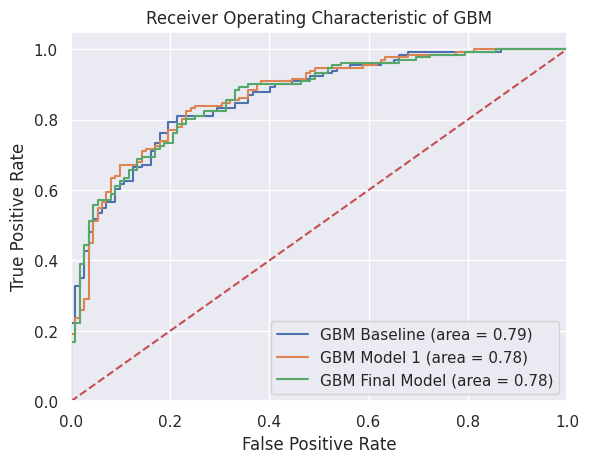

<Figure size 640x480 with 0 Axes>

In [56]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


#run models
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2,
                                      min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)

model1 = GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,max_depth=max_depth_gbm,
                                    min_samples_split=2,
                                    min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)

new=GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                               max_depth=max_depth_gbm, min_samples_split=20, min_samples_leaf=min_samples_leaf_gbm,
                               max_features=max_features_gbm, subsample=subsample_gbm, random_state=random_state_gbm)
new.fit(X_train,y_train)
baseline_roc_auc = roc_auc_score(y_test, baseline.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, baseline.predict_proba(X_test)[:,1])
#model 1
model1_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
#new tuned model
new_roc_auc = roc_auc_score(y_test, new.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, new.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fprB, tprB, label='GBM Baseline (area = %0.2f)' % baseline_roc_auc)
plt.plot(fpr1, tpr1, label='GBM Model 1 (area = %0.2f)' % model1_roc_auc)
plt.plot(fprnew, tprnew, label='GBM Final Model (area = %0.2f)' % new_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of GBM')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

plt.savefig('roc1.eps', format='eps')

In [57]:
print('Accuracy of the GBM on test set for Baseline Model: {:.3f}'.format(baseline.score(X_test, y_test)))
print('Accuracy of the GBM on test set for Model1: {:.3f}'.format(model1.score(X_test, y_test)))
print('Accuracy of the GBM on test set for New Model: {:.3f}'.format(new.score(X_test, y_test)))

Accuracy of the GBM on test set for Baseline Model: 0.790
Accuracy of the GBM on test set for Model1: 0.786
Accuracy of the GBM on test set for New Model: 0.778
